In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from kaggle_hm.chart_model import filter_data
from kaggle_hm.config import data_root, train_dates, test_dates
from kaggle_hm.evaluation import compute_precision, enrich_data
from kaggle_hm.utils import visualize_items

In [2]:
df = pd.read_parquet(data_root / 'clean' / 'transactions.parquet')
c = pd.read_parquet(data_root / 'clean' / 'customers.parquet')
c['age'] = c['age'].fillna(c['age'].mean())
c['age_group'] = pd.cut(c['age'], bins=[15, 21, 25, 30, 40, 50, 60, 100])

items = pd.read_parquet(data_root / 'clean' / 'articles.parquet')
df = df.merge(items[['article_id', 'product_type_name', 'department_name', 'perceived_colour_master_name']], on='article_id')

In [4]:
first_transactions = (
    df
    .groupby('customer_id', observed=True, as_index=False)
    .agg(
        first_transaction_dt=('t_dat', 'min'),
    )
)
first_transactions = first_transactions[first_transactions['first_transaction_dt'].between('2020-07-01', '2020-09-22')]

In [33]:
first_items = df.merge(first_transactions, left_on=['customer_id', 't_dat'], right_on=['customer_id', 'first_transaction_dt'])

In [34]:
first_items.shape

(219302, 6)

In [17]:
first_items['article_id'].value_counts().head(10)

0706016001    335
0751471001    327
0760084003    320
0610776002    302
0372860002    289
0730683050    264
0850917001    262
0759871025    252
0717490064    251
0866383006    244
Name: article_id, dtype: int64

# top items for cold customers and all sales last 2 month

/data/sstamenov/kaggle-data//images/061/0610776002.jpg not found


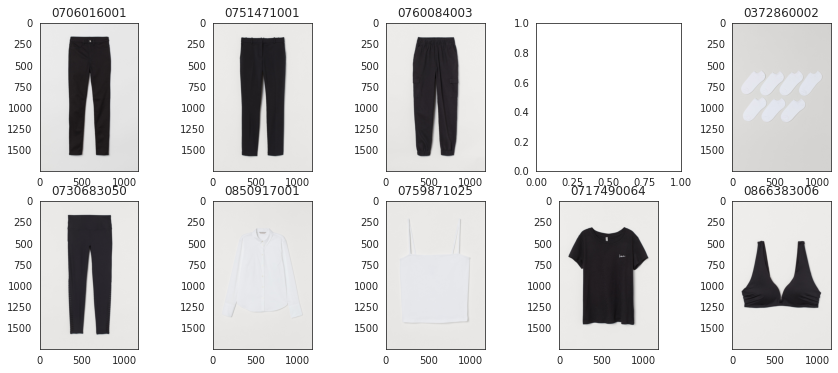

In [18]:
visualize_items(first_items['article_id'].value_counts().head(10).index, rows=2, columns=5)

/data/sstamenov/kaggle-data//images/061/0610776002.jpg not found


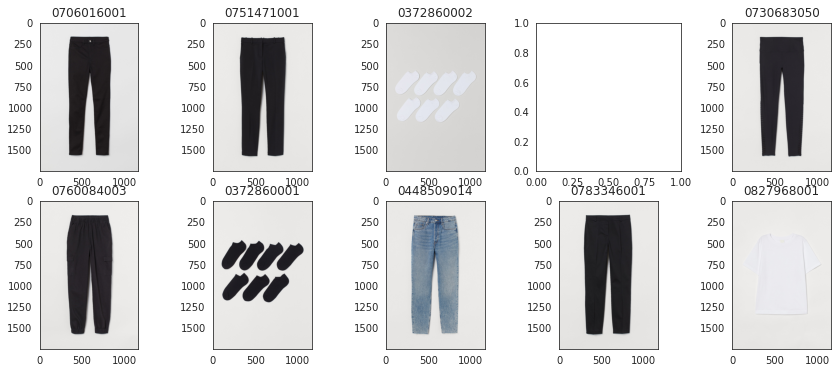

In [10]:
visualize_items(filter_data(df, '2020-07-01', '2020-09-08')['article_id'].value_counts().head(10).index, rows=2, columns=5)

50% overlap, and different order

# top items by new customers in sept

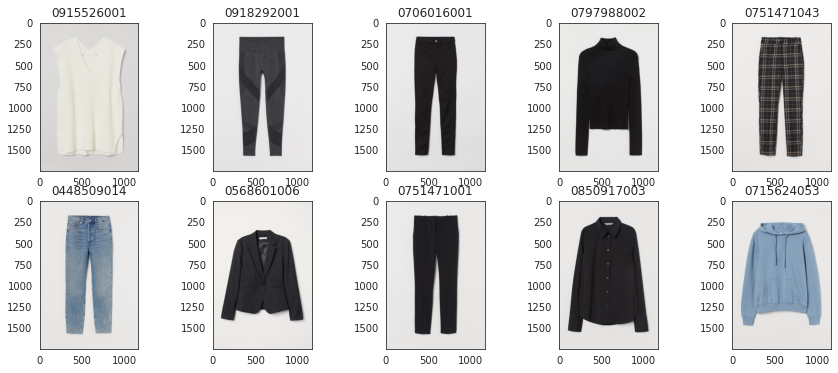

In [21]:
visualize_items(first_items[first_items['t_dat'].between('2020-09-01', '2020-09-08')]['article_id'].value_counts().head(10).index, rows=2, columns=5)

In [22]:
first_items[first_items['t_dat'].between('2020-09-01', '2020-09-08')]['article_id'].value_counts().head(10)

0915526001    74
0918292001    61
0706016001    61
0797988002    61
0751471043    58
0448509014    55
0568601006    54
0751471001    52
0850917003    49
0715624053    47
Name: article_id, dtype: int64

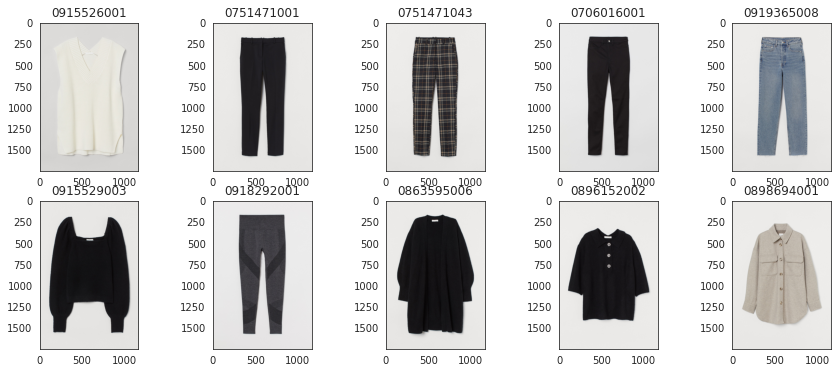

In [20]:
visualize_items(filter_data(df, '2020-09-01', '2020-09-08')['article_id'].value_counts().head(10).index, rows=2, columns=5)

top items overlap 75%-80%, but the order is different, which might be important for the predictions

In [24]:
filter_data(df, '2020-09-01', '2020-09-08')['article_id'].value_counts().head(10)

0915526001    913
0751471001    849
0751471043    844
0706016001    788
0919365008    717
0915529003    714
0918292001    695
0863595006    612
0896152002    598
0898694001    564
Name: article_id, dtype: int64

# week2week

/data/sstamenov/kaggle-data//images/061/0610776002.jpg not found


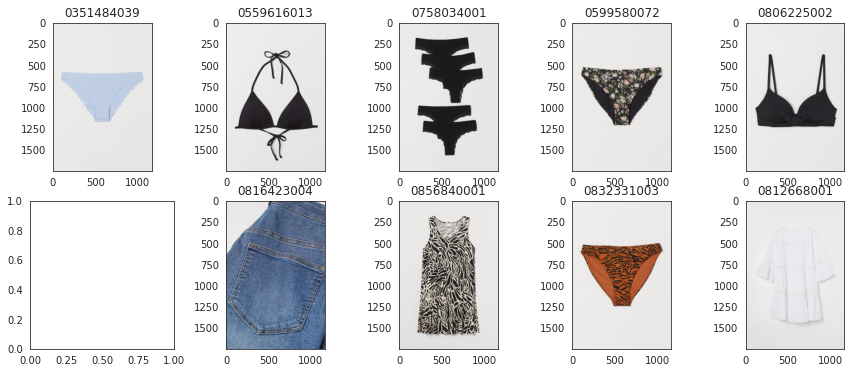

In [25]:
visualize_items(first_items[first_items['t_dat'].between('2020-08-10', '2020-08-16')]['article_id'].value_counts().head(10).index, rows=2, columns=5)

/data/sstamenov/kaggle-data//images/061/0610776002.jpg not found


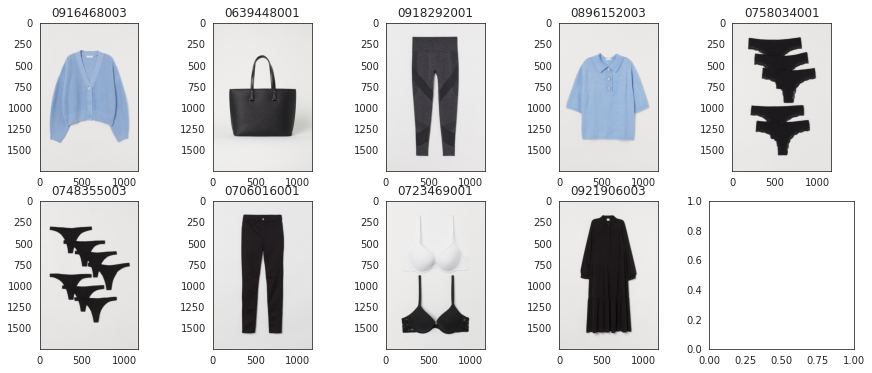

In [26]:
visualize_items(first_items[first_items['t_dat'].between('2020-08-17', '2020-08-23')]['article_id'].value_counts().head(10).index, rows=2, columns=5)

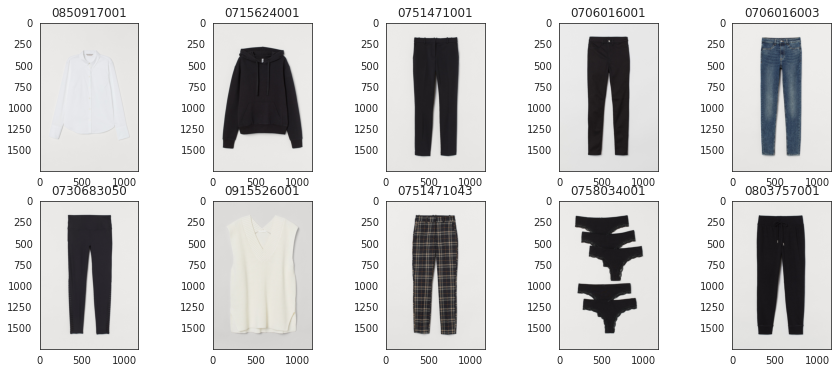

In [27]:
visualize_items(first_items[first_items['t_dat'].between('2020-08-24', '2020-08-30')]['article_id'].value_counts().head(10).index, rows=2, columns=5)

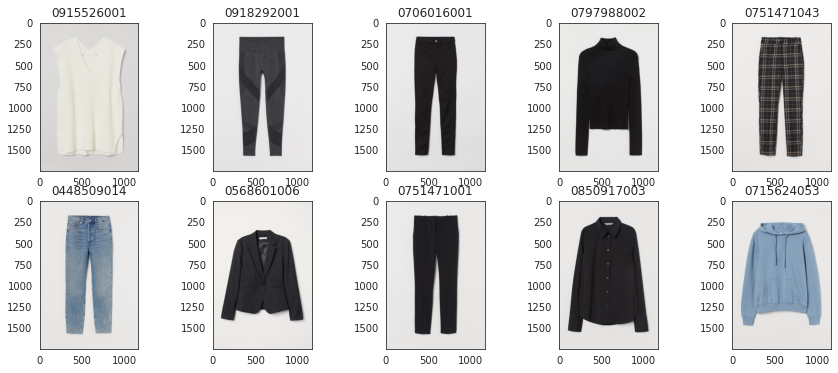

In [28]:
visualize_items(first_items[first_items['t_dat'].between('2020-09-01', '2020-09-08')]['article_id'].value_counts().head(10).index, rows=2, columns=5)

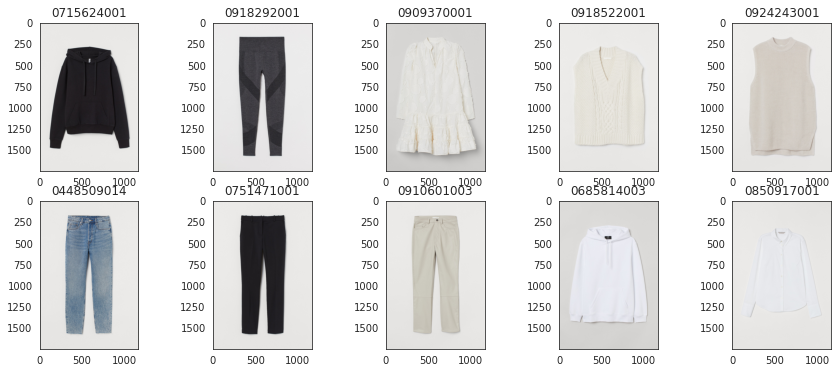

In [35]:
visualize_items(first_items[first_items['t_dat'].between('2020-09-09', '2020-09-15')]['article_id'].value_counts().head(10).index, rows=2, columns=5)

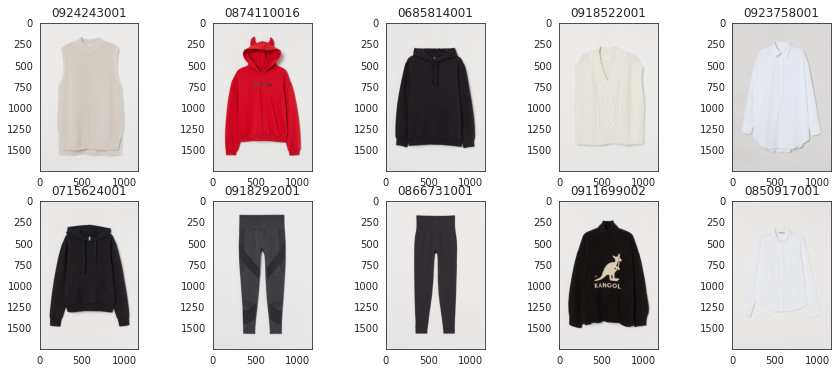

In [36]:
visualize_items(first_items[first_items['t_dat'].between('2020-09-15', '2020-09-22')]['article_id'].value_counts().head(10).index, rows=2, columns=5)

In [42]:
sept_2019 = df[df['t_dat'].between('2019-09-16', '2019-09-22')].merge(items, on='article_id')

In [49]:
sept_2020_prev = df[df['t_dat'].between('2020-09-07', '2020-09-13')].merge(items, on='article_id')
sept_2020 = df[df['t_dat'].between('2020-09-14', '2020-09-20')].merge(items, on='article_id')

In [51]:
pd.DataFrame({
    '2019': sept_2019['perceived_colour_master_name'].value_counts(normalize=True),
    '2020_1': sept_2020_prev['perceived_colour_master_name'].value_counts(normalize=True),
    '2020_2': sept_2020['perceived_colour_master_name'].value_counts(normalize=True),
}).corr()

,2019,2020_1,2020_2
2019,1.000000,0.985240,0.985415
2020_1,0.985240,1.000000,0.999428
2020_2,0.985415,0.999428,1.000000


In [59]:
pd.DataFrame({
    '2019': sept_2019['product_type_namea'].value_counts(),
    '2020_1': sept_2020_prev['product_type_name'].value_counts(),
    '2020_2': sept_2020['product_type_name'].value_counts(),
})

,2019,2020_1,2020_2
Accessories set,0,14,6
Alice band,5,7,1
Baby Bib,1,4,3
Backpack,20,9,13
Bag,1546,1539,1510
...,...,...,...
Wedge,34,90,51
Weekend/Gym bag,19,26,31
Wireless earphone case,0,6,8
Wood balls,0,1,0


# Cat features customer's preferences

In [ ]:
# product_type_name, department_name, perceived_colour_master_name, section_name

In [24]:
train = df[df['t_dat'].between('2020-09-01', '2020-09-08')].copy()

In [ ]:
test = df[df['t_dat'].between('2020-09-09', '2020-09-15')].copy()

In [26]:
cond = (
    (df['t_dat'] < '2020-09-01') &
    (df['customer_id'].isin(train['customer_id'].unique()))
)

def cat_feature_prop(transactions, cat_feature):
    beta_a = 2
    beta_b = 5

    stats = (
        transactions.groupby(['customer_id', cat_feature], observed=True, as_index=False)
        .agg(
            total=('article_id', 'count'),
            uniq_total=('article_id', 'nunique'),
            money_spent=('price', 'sum')
        )
    )
    stats = stats.merge(stats.groupby('customer_id', as_index=False, observed=True).agg(items_total=('total', 'sum')), on='customer_id')
    stats[f'{cat_feature}_preference'] = (beta_a + stats['total']) / (beta_a + beta_b + stats['items_total'])

    return stats[['customer_id', cat_feature, f'{cat_feature}_preference']]

In [27]:
prod_type_stats = cat_feature_prop(df[cond], 'product_type_name')
train = train.merge(prod_type_stats, on=['customer_id', 'product_type_name'], how='left')

In [28]:
prod_type_stats = cat_feature_prop(df[cond], 'perceived_colour_master_name')
train = train.merge(prod_type_stats, on=['customer_id', 'perceived_colour_master_name'], how='left')

In [29]:
train.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_type_name,department_name,perceived_colour_master_name,product_type_name_preference,perceived_colour_master_name_preference
0,2020-09-08,15e5ef536970c9233e38dd9d325dc723caea366965d891...,0562252035,0.012695,1,Trousers,Trouser,Blue,0.186047,0.156977
1,2020-09-01,184d50669236cb73eaa41f3f412ff6b5d8c45cc5e6a356...,0573937001,0.016932,2,Trousers,Woven bottoms,Black,0.440000,0.390000
2,2020-09-01,3ed6582529662d7ba6f741413a242a1c3caa3020f801a2...,0573937001,0.016932,2,Trousers,Woven bottoms,Black,0.194030,0.328358
3,2020-09-01,8843ae362dc88e97bc839c7c53673233f9fed4f92ba32d...,0573937001,0.016932,2,Trousers,Woven bottoms,Black,0.350365,0.343066
4,2020-09-01,ef814e1d685c1aaf5807d2961d9e8de18faf7b2837d7ab...,0573937001,0.016373,2,Trousers,Woven bottoms,Black,0.271845,0.398058


In [43]:
stats.groupby('product_type_name')['total'].describe()

,count,mean,std,min,25%,50%,75%,max
product_type_name,,,,,,,,
Accessories set,44.0,1.113636,0.386752,1.0,1.0,1.0,1.00,3.0
Alice band,943.0,1.125133,0.448203,1.0,1.0,1.0,1.00,5.0
Baby Bib,142.0,1.197183,0.522398,1.0,1.0,1.0,1.00,4.0
Backpack,1653.0,1.047187,0.248871,1.0,1.0,1.0,1.00,5.0
Bag,138963.0,1.575203,1.295050,1.0,1.0,1.0,2.00,77.0
...,...,...,...,...,...,...,...,...
Wedge,26055.0,1.483784,1.099853,1.0,1.0,1.0,2.00,42.0
Weekend/Gym bag,1289.0,1.084562,0.343284,1.0,1.0,1.0,1.00,5.0
Wireless earphone case,252.0,1.051587,0.255063,1.0,1.0,1.0,1.00,3.0


<AxesSubplot:>

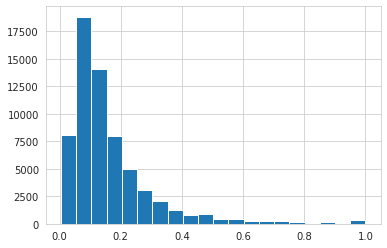

In [49]:
stats[stats['product_type_name'] == 'T-shirt'].query('total > 5')['p'].hist(bins=20)

In [56]:
stats[stats['product_type_name'] == 'T-shirt'].sample(n=5)

,customer_id,product_type_name,total,uniq_total,money_spent,items_total,p
8676642,b720a1ad8587c8f08602954367c04ad7b02b3ec364cc1a...,T-shirt,1,1,0.025407,15,0.066667
10129870,ee215bac9553bc53a7c23dbe193b3bb6c1741d950aeb3b...,T-shirt,1,1,0.007610,3,0.333333
5194181,d10d792f65b21ccad15c5775654b6a5d41abea64ba5e6f...,T-shirt,2,2,0.030475,24,0.083333
3587829,310abb1436b95cfbb1ce7be21c401e9a8abe9903b8f581...,T-shirt,21,20,0.224508,78,0.269231
6545358,fe05d7aad9ead94f142884ab9ffedfe03263af7806db44...,T-shirt,1,1,0.008458,13,0.076923


In [24]:
from scipy.stats import beta

In [25]:
x = np.arange(0, 1, 0.01)

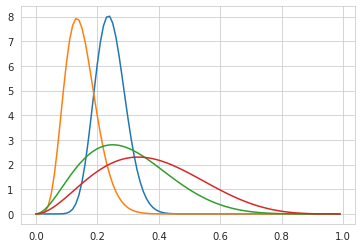

In [59]:
from matplotlib import pyplot as plt

beta_a = 2
beta_b = 5

# items in category, total - items in category
plt.plot(x, beta.pdf(x, beta_a + 16, beta_b + (67 - 16)))
plt.plot(x, beta.pdf(x, beta_a + 5, beta_b + (40 - 5)))
plt.plot(x, beta.pdf(x, beta_a + 1, beta_b + (3 - 1)))
plt.plot(x, beta.pdf(x, beta_a + 1, beta_b + (1 - 1)))

In [53]:
pd.DataFrame({
    '2019': sept_2019['product_type_name'].value_counts(normalize=True),
    '2020_1': sept_2020_prev['product_type_name'].value_counts(normalize=True),
    '2020_2': sept_2020['product_type_name'].value_counts(normalize=True),
})

,2019,2020_1,2020_2
Accessories set,0.000000,0.000051,0.000026
Alice band,0.000022,0.000026,0.000004
Baby Bib,0.000004,0.000015,0.000013
Backpack,0.000086,0.000033,0.000056
Bag,0.006656,0.005626,0.006528
...,...,...,...
Wedge,0.000146,0.000329,0.000220
Weekend/Gym bag,0.000082,0.000095,0.000134
Wireless earphone case,0.000000,0.000022,0.000035
Wood balls,0.000000,0.000004,0.000000


In [52]:
pd.DataFrame({
    '2019': sept_2019['product_type_name'].value_counts(normalize=True),
    '2020_1': sept_2020_prev['product_type_name'].value_counts(normalize=True),
    '2020_2': sept_2020['product_type_name'].value_counts(normalize=True),
}).corr()

,2019,2020_1,2020_2
2019,1.000000,0.986925,0.987656
2020_1,0.986925,1.000000,0.998434
2020_2,0.987656,0.998434,1.000000


In [58]:
pd.DataFrame({
    '2019': sept_2019['department_name'].value_counts(normalize=True),
    '2020_1': sept_2020_prev['department_name'].value_counts(normalize=True),
    '2020_2': sept_2020['department_name'].value_counts(normalize=True),
}).sort_values('2020_1', ascending=False) * 100

,2019,2020_1,2020_2
Knitwear,9.938091,10.142009,9.778694
Trouser,6.291168,5.907704,5.945294
Blouse,4.982392,5.346614,6.146324
Basic 1,4.155366,4.773828,4.159804
Jersey Basic,4.689209,4.652837,4.446865
...,...,...,...
Sneakers small girl inactive from s2,0.001722,0.000000,0.000000
Sneakers big girl inactive from s2,0.000431,0.000000,0.000000
Baby Boy Local Relevance,0.000000,0.000000,0.000000
Small Bags,0.014638,0.000000,0.000000


In [54]:
pd.DataFrame({
    '2019': sept_2019['department_name'].value_counts(normalize=True),
    '2020_1': sept_2020_prev['department_name'].value_counts(normalize=True),
    '2020_2': sept_2020['department_name'].value_counts(normalize=True),
}).corr()

,2019,2020_1,2020_2
2019,1.000000,0.976294,0.983526
2020_1,0.976294,1.000000,0.992741
2020_2,0.983526,0.992741,1.000000


In [3]:
cols = [f'rel_{i + 1}' for i in range(12)]
test = filter_data(df, from_date=test_dates['start'], to_date=test_dates['end'])
train = filter_data(df, from_date='2020-09-01', to_date=train_dates['end'])
results = test.groupby('customer_id', observed=True).agg(bought=('article_id', set)).reset_index()
results = results.merge(c, left_on='customer_id', right_index=True)
old_customers = set(filter_data(df, to_date=train_dates['end'])['customer_id'].unique())

In [5]:
train_cold_customers = set(train['customer_id'].unique()) - set(filter_data(df, to_date='2020-09-01')['customer_id'].unique())

In [7]:
train['segment'] = "train"

train.loc[train['customer_id'].isin(train_cold_customers), 'segment'] = "cold"

/tmp/ipykernel_588864/4026947754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['segment'] = "train"


In [10]:
stats = train.groupby(['segment', 'article_id'], observed=True).agg(total=('customer_id', 'count')).reset_index()

In [18]:
items = pd.read_parquet(data_root / 'clean/articles.parquet')

In [22]:
stats = stats.merge(items, on='article_id', how='left')

In [33]:
pd.DataFrame({
    'cold': stats[stats['segment'] == 'cold'].sort_values('total', ascending=False).reset_index().head(12)['prod_name'],
    'train': stats[stats['segment'] == 'train'].sort_values('total', ascending=False).reset_index().head(12)['prod_name'],
})

,cold,train
0,Pluto RW slacks (1),Nika vest
1,Nika vest,Pluto RW slacks (1)
2,Furby Roll Neck,Pluto RW slacks (1)
3,Perrie Slim Mom Denim TRS,Jade HW Skinny Denim TRS
4,STRONG HW seamless tights,Liliana
5,Jade HW Skinny Denim TRS,Merry HW Slim Mom Denim TRS
6,Sadie Shirt,STRONG HW seamless tights
7,Pluto RW slacks (1),Baraboom throw-on
8,Mariette Blazer,Amelie
9,Nicky long.,Jasba jersey shacket


In [34]:
stats[stats['segment'] == 'cold'].sort_values('total', ascending=False).head(12)

,segment,article_id,total,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
126,cold,0751471043,62,751471,Pluto RW slacks (1),272,Trousers,Garment Lower body,1010004,Check,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Ankle-length cigarette trousers in a stretch w...
4,cold,0915526001,60,915526,Nika vest,252,Sweater,Garment Upper body,1010016,Solid,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Relaxed-fit slipover in a soft, rib-knit cotto..."
461,cold,0797988002,59,797988,Furby Roll Neck,254,Top,Garment Upper body,1010016,Solid,...,Tops Knitwear,D,Divided,2,Divided,53,Divided Collection,1003,Knitwear,Fitted jumper in a soft rib knit with a foldov...
607,cold,0448509014,55,448509,Perrie Slim Mom Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,"5-pocket, ankle-length jeans in washed, sturdy..."
322,cold,0918292001,52,918292,STRONG HW seamless tights,273,Leggings/Tights,Garment Lower body,1010010,Melange,...,Ladies Sport Bottoms,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...
24,cold,0706016001,50,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
987,cold,0850917003,50,850917,Sadie Shirt,259,Shirt,Garment Upper body,1010016,Solid,...,Blouse,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1010,Blouses,Gently fitted shirt in a stretch weave made fr...
141,cold,0751471001,48,751471,Pluto RW slacks (1),272,Trousers,Garment Lower body,1010016,Solid,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Ankle-length cigarette trousers in a stretch w...
1167,cold,0568601006,46,568601,Mariette Blazer,264,Blazer,Garment Upper body,1010016,Solid,...,Suit,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1008,Dressed,Fitted jacket in woven fabric with notch lapel...
388,cold,0717464001,43,717464,Nicky long.,253,Vest top,Garment Upper body,1010016,Solid,...,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,"Longer, fitted top in stretch cotton jersey wi..."


In [28]:
stats[stats['segment'] == 'train'].sort_values('total', ascending=False).head(12)

,segment,article_id,total,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
6184,train,0915526001,853,915526,Nika vest,252,Sweater,Garment Upper body,1010016,Solid,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Relaxed-fit slipover in a soft, rib-knit cotto..."
6358,train,0751471001,801,751471,Pluto RW slacks (1),272,Trousers,Garment Lower body,1010016,Solid,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Ankle-length cigarette trousers in a stretch w...
6339,train,0751471043,782,751471,Pluto RW slacks (1),272,Trousers,Garment Lower body,1010004,Check,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Ankle-length cigarette trousers in a stretch w...
6206,train,0706016001,738,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
6415,train,0915529003,695,915529,Liliana,252,Sweater,Garment Upper body,1010016,Solid,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Jumper in a soft, fine knit containing some wo..."
7380,train,0919365008,687,919365,Merry HW Slim Mom Denim TRS,272,Trousers,Garment Lower body,1010023,Denim,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,"5-pocket, ankle-length jeans in washed, stretc..."
6622,train,0918292001,643,918292,STRONG HW seamless tights,273,Leggings/Tights,Garment Lower body,1010010,Melange,...,Ladies Sport Bottoms,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...
6951,train,0863595006,587,863595,Baraboom throw-on,245,Cardigan,Garment Upper body,1010016,Solid,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Long cardigan in a soft, fine knit containing ..."
6330,train,0896152002,576,896152,Amelie,255,T-shirt,Garment Upper body,1010016,Solid,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,"Top in a soft, fine knit containing some wool ..."
6307,train,0898694001,543,898694,Jasba jersey shacket,264,Blazer,Garment Upper body,1010010,Melange,...,Suit jacket,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1008,Dressed,"Shirt jacket in jersey with a collar, buttons ..."


In [35]:
cold_top = stats[stats['segment'] == 'cold'].sort_values('total', ascending=False).reset_index().head(12)['article_id'].tolist()

In [39]:
results['prediction'] = [cold_top for i in range(results.shape[0])]
results = compute_precision(results)

In [41]:
results['precision'].mean()

0.005739175788898906

In [43]:
cond = ~results['customer_id'].isin(old_customers)
results[cond]['precision'].mean()

0.006883720609409078